# Non-Text Data Exploration

In [1]:
#!pip install pandas-profiling[notebook]
!pip install nltk
!pip install textblob
!pip install langdetect
!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#from pandas_profiling import ProfileReport

In [3]:
# Read in MakeupAlley Reviews dataset
products = pd.read_csv('data/products.csv').drop('index',axis=1)
products.head()

,product,user_id,age,date,review,ratings,repurchase,packaging,price
0,Blush - Orgasm,kyl77,36-43,21 days ago,This blush is suppose to be a universally flat...,5.0,65%,4.1,4
1,Blush - Orgasm,ladyinred29,44-55,25 days ago,This blush is a beautiful color. It isn't ter...,3.0,65%,4.1,4
2,Blush - Orgasm,BougieAngel,30-35,a month ago,After purchasing this I didn't want to touch i...,4.0,65%,4.1,4
3,Blush - Orgasm,Leahmoriah4,44-55,2 months ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,65%,4.1,4
4,Blush - Orgasm,Avalonian1172,30-35,3 months ago,I have to mention that the case is fabulous. A...,4.0,65%,4.1,4


In [4]:
# quick data exploration with pandas profiling
# profile = ProfileReport(products, title="MakeUpAlley Pandas Profiling Report", explorative=True)
# profile.to_widgets()

In [5]:
print(products.shape)
print(products.info())

(10351, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10351 entries, 0 to 10350
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   product     10351 non-null  object 
 1   user_id     10351 non-null  object 
 2   age         10104 non-null  object 
 3   date        10351 non-null  object 
 4   review      10351 non-null  object 
 5   ratings     10351 non-null  float64
 6   repurchase  10351 non-null  object 
 7   packaging   10351 non-null  float64
 8   price       10351 non-null  int64  
dtypes: float64(2), int64(1), object(6)
memory usage: 727.9+ KB
None


In [6]:
# Check for presence of NaN values
products.isnull().sum()

product         0
user_id         0
age           247
date            0
review          0
ratings         0
repurchase      0
packaging       0
price           0
dtype: int64

In [7]:
# Replace rows with null values using most frequent Age Group
mode_age = products['age'].value_counts().head(1).index[0]
products['age'] = products['age'].fillna(mode_age)

# Check if there's still any null values
products.isnull().sum()

product       0
user_id       0
age           0
date          0
review        0
ratings       0
repurchase    0
packaging     0
price         0
dtype: int64

In [8]:
products['product'].value_counts()
# Most popular product is Blush - Orgasm

Blush - Orgasm         5332
Blush - Deep Throat    1165
Blush - Sin             766
Blush - Torrid          497
Blush - Exhibit A       371
Blush - Amour           310
Blush - Luster          302
Blush - Angelika        297
Mata Hari Blush         272
Blush - Taj Mahal       262
Super Orgasm            249
Blush - Madly           248
Blush - Dolce Vita      155
Blush - Sex Appeal      125
Name: product, dtype: int64

In [9]:
products['user_id'].value_counts()
# Drop this feature because too many values

LayoverLifestyle     13
kathrynb23           12
JGardella            11
carrasco             10
izzybella             9
                     ..
payyar89              1
NYMakeupJunkie        1
PinkHairKinkyGoth     1
Smilexox              1
tweettweet            1
Name: user_id, Length: 7956, dtype: int64

In [10]:
products['date'].value_counts()
# Drop '14 years ago' and above, regroup 'months ago' rows as 'a year ago'

11 years ago     1337
12 years ago     1236
10 years ago     1117
13 years ago      880
17 years ago      759
16 years ago      719
9 years ago       699
14 years ago      697
15 years ago      673
18 years ago      633
8 years ago       542
7 years ago       336
6 years ago       228
5 years ago       141
19 years ago      132
4 years ago        81
3 years ago        48
2 years ago        34
20 years ago       25
a year ago         18
7 months ago        3
3 months ago        2
8 months ago        2
10 months ago       2
2 months ago        1
21 days ago         1
9 months ago        1
5 months ago        1
25 days ago         1
a month ago         1
6 months ago        1
Name: date, dtype: int64

In [11]:
products['price'].value_counts()
# Drop this feature because not useful

4    10351
Name: price, dtype: int64

In [12]:
products['ratings'].value_counts()
# This will be our target variable, will be changing it to binary instead

5.0    5563
4.0    2393
3.0    1403
2.0     673
1.0     319
Name: ratings, dtype: int64

In [13]:
products['age'].value_counts()

19-24        3994
25-29        2539
30-35        1601
36-43         873
Under 18      872
44-55         384
56 & Over      88
Name: age, dtype: int64

In [14]:
products['packaging'].value_counts()
# Generally Good packaging rating because at least 4/5

4.1    5581
4.2    2351
4.3    2109
4.4     310
Name: packaging, dtype: int64

In [15]:
products['repurchase'].value_counts()
# All are above 50% repurchase rating

65%    5332
79%    1490
81%    1413
86%    1178
88%     302
85%     262
57%     249
75%     125
Name: repurchase, dtype: int64

In [16]:
products.groupby(['product'])['repurchase'].value_counts()
# Every product only has 1 repurchase rating, cannot be used to decide if one reviewer is more likely to repurchase

product              repurchase
Blush - Amour        86%            310
Blush - Angelika     79%            297
Blush - Deep Throat  81%           1165
Blush - Dolce Vita   79%            155
Blush - Exhibit A    86%            371
Blush - Luster       88%            302
Blush - Madly        81%            248
Blush - Orgasm       65%           5332
Blush - Sex Appeal   75%            125
Blush - Sin          79%            766
Blush - Taj Mahal    85%            262
Blush - Torrid       86%            497
Mata Hari Blush      79%            272
Super Orgasm         57%            249
Name: repurchase, dtype: int64

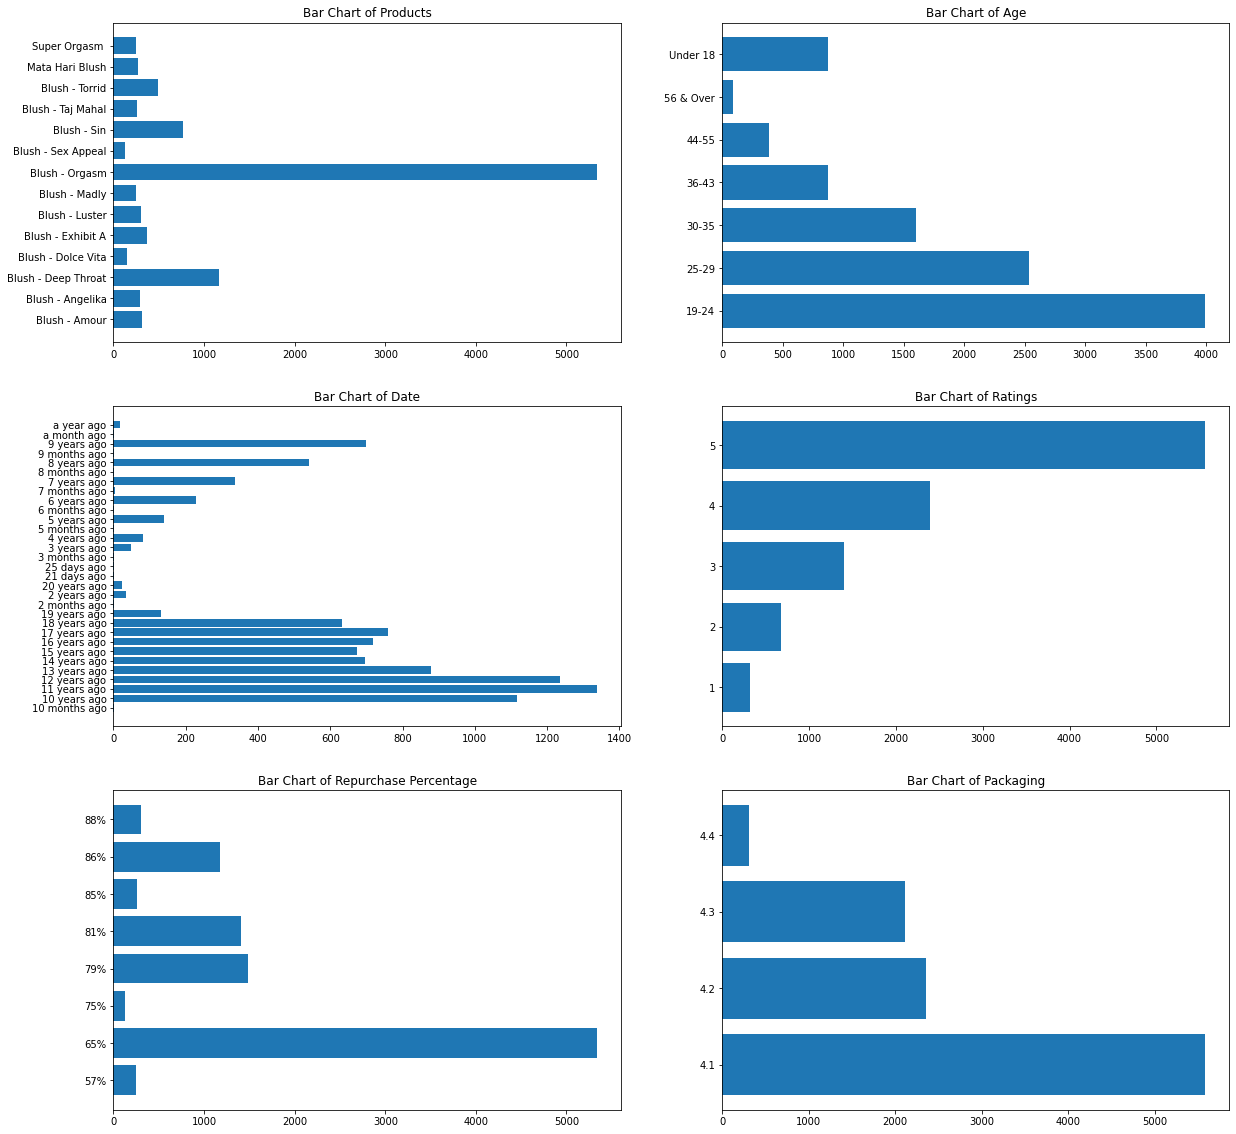

In [17]:
# Plot distribution for Product, Age, Date, Ratings, Repurchase and Packaging
fig, ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].barh(products['product'].value_counts().sort_index().index,products['product'].value_counts().sort_index().values)
ax[0,0].title.set_text('Bar Chart of Products')
ax[0,1].barh(products['age'].value_counts().sort_index().index,products['age'].value_counts().sort_index().values)
ax[0,1].title.set_text('Bar Chart of Age')

ax[1,0].barh(products['date'].value_counts().sort_index().index,products['date'].value_counts().sort_index().values)
ax[1,0].title.set_text('Bar Chart of Date')
ax[1,1].barh(products['ratings'].value_counts().sort_index().index,products['ratings'].value_counts().sort_index().values)
ax[1,1].title.set_text('Bar Chart of Ratings')

ax[2,0].barh(products['repurchase'].value_counts().sort_index().index,products['repurchase'].value_counts().sort_index().values)
ax[2,0].title.set_text('Bar Chart of Repurchase Percentage')
ax[2,1].barh(products['packaging'].astype(str).value_counts().sort_index().index,products['packaging'].astype(str).value_counts().sort_index().values)
ax[2,1].title.set_text('Bar Chart of Packaging')

# Most of the reviewers are millennials (reasonable, follows expectations)
# Repurchase percentages are generally quite high (all >= 50%)
# Overall Ratings are also generally quite high (more than half gave 5/5)
# Packaging rating also generally quite high (at least 4/5 stars)
# Reasonable and follows expectations because NARS is a famous makeup brand with high quality pigmented products

# Text Data Exploration

In [18]:
from langdetect import detect
from wordcloud import WordCloud
import re

In [19]:
# Check for random sample of reviews
pd.set_option('display.max_colwidth', 200)
products['review'].sample(n=10)

9116    I see a lot of people saying this is Orgasm crossed with Serteo or very close.  I don't know that I'd agree with that.  I think it's what people hoped Serteo might be before it was released.  The ...
5098    After reading all the other reviews, I expected this blush to be fantastic.  It was nice, but not great.  The shimmer did not show up on my very pale skin, but it did look nice.  Overall, I am dia...
8285    This blush is amazing for women of colour and its sad to see that sephora discounted it. This blush just gives me a glow that is so sexy and gorgeous. Women of colour need to have an orange blush....
8069    OK, but not a favorite. I love the pinched cheek, "it's cold outside" look, and I feel like Mata Hari doesn't cut it. Freshly applied, it's quite rosy, but as the day goes on it turns into an unfl...
3074               Endlessly imitated but not yet duplicated. I held off on buying this for years -- doubtless we're responding at least in part to the name, but DAMN i

count    10351.000000
mean       449.610859
std        348.451299
min          0.000000
25%        232.000000
50%        366.000000
75%        567.000000
max       6000.000000
Name: review_length, dtype: float64


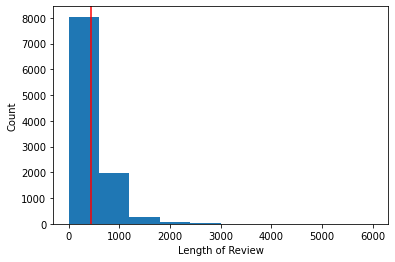

In [20]:
products['review_length'] = products['review'].apply(lambda x: len(x.strip()))
plt.hist(products['review_length'])
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.axvline(x=products['review_length'].mean(), color='red')
print(products['review_length'].describe())

# Most reviews have sufficient number of characters for analysis, average of 450 words

<AxesSubplot:>

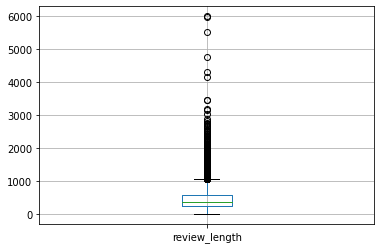

In [21]:
# Check for presence of outliers
products.boxplot('review_length')

In [22]:
# Explore the reviews that have very long lengths
products[products['review_length'] > 3000]

,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
51,Blush - Orgasm,valmont32677,36-43,3 years ago,The “Markle Sparkle” prevails! Meghan Markle loves this blush (the duchess of Sussex). And it’s easy to see why! It’s a super easy to wear peachy golden sheen. It gives my face light. I bought thi...,5.0,65%,4.1,4,4317
550,Blush - Orgasm,Labloah,36-43,8 years ago,"Yes, it's a hyped product, but after trying this, I can certainly see why people adore it.\r\n\r\nI must admit, it took me a while to actually splurge and buy this, as I couldn't justify spending ...",5.0,65%,4.1,4,3463
2823,Blush - Orgasm,strawberita1,30-35,12 years ago,I am very sad that I waited so long to purchase this blush. I will break down why I adore it so much. I apologize in advance for this long review although I hope it is informative.\r\n\r\n\r\nColo...,5.0,65%,4.1,4,3033
2855,Blush - Orgasm,lipglosseater,19-24,12 years ago,"*Click on ""Continued>>"" to view pics / full review*\r\n\r\n<img src=""http://i100.photobucket.com/albums/m35/medagreat/orgasm.jpg"" />\r\n\r\n<b><u>At a Glance:</u></b>\r\n<b>Price:</b> US$25 (appro...",4.0,65%,4.1,4,5991
3085,Blush - Orgasm,gingerrama,30-35,13 years ago,"UPDATE: Well, it's very nice, but there are now plenty of Orgasmalikes out there, and plenty that don't irritate or make pores look big or glittery. But I'll leave this up, as my first proper blus...",3.0,65%,4.1,4,5519
5455,Blush - Deep Throat,genarod,25-29,8 years ago,"This is a very easy blush to fall in love with.\r\n\r\nI guess to start I will say that I am light skinned, a nc15-20, with medium brown hair/eyes. I have a slight olive undertone, but mostly jus...",4.0,81%,4.2,4,3151
6022,Blush - Deep Throat,lipglosseater,19-24,12 years ago,"*Click on ""Continued>>"" to view pics / full review*\r\n\r\n<img src=""http://i100.photobucket.com/albums/m35/medagreat/Narsdeepthroat.jpg"" />\r\n\r\n<b><u>At a Glance:</u></b>\r\n<b>Price:</b> US$2...",5.0,81%,4.2,4,6000
7653,Blush - Dolce Vita,storybookheroine,30-35,12 years ago,"When the first pictures of Dolce Vita popped up on the internet I have to admit I was disappointed. It was dark, muddy, matte and did nothing to make me want it. Now I LOVE Dolce Vita lipst...",4.0,79%,4.3,4,3183
8190,Blush - Taj Mahal,scarski91,25-29,4 years ago,"Skin ref: Lancome Teint Miracle in #005 Beige Ivory. Very fair -fair skin with warm yellow/gold undertones. Golden blonde hair warm honey-like blonde highlights, hazel eyes (brown-green) that chan...",5.0,85%,4.2,4,3450
8642,Blush - Exhibit A,J_cool,25-29,12 years ago,"Upon reading dozens of reviews on NARS’ Exhibit A blush, I was really excited about purchasing it. After several days of using the product, I can honestly say that it is, indeed, different than an...",1.0,86%,4.3,4,4149


In [23]:
# Check for number of rows that contains "*Click on "Continued>>"
products['review'].str.contains('\*Click on "Continued>>').sum()

3

In [24]:
# Remove reviews that contains "*Click on "Continued>>"
products = products[~products['review'].str.contains('\*Click on "Continued>>')]

In [25]:
# Check for review with 0 length
products[products['review_length'] == 0]

,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
466,Blush - Orgasm,oppositeofdog,Under 18,7 years ago,,5.0,65%,4.1,4,0


In [26]:
# Remove the review 
products = products[products['review_length'] > 0]

In [27]:
# Check for current min review length
products['review_length'].describe()

count    10347.000000
mean       448.163816
std        337.172719
min          4.000000
25%        232.000000
50%        366.000000
75%        567.000000
max       5519.000000
Name: review_length, dtype: float64

In [28]:
# Check for review with small length to see if sufficient for analysis
products[products['review_length'] <= 10]

,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length
26,Blush - Orgasm,Abelaine,36-43,2 years ago,I love it,5.0,65%,4.1,4,9
126,Blush - Orgasm,AnnaScrimgeour,25-29,5 years ago,Good,5.0,65%,4.1,4,4
274,Blush - Orgasm,linehmor,19-24,6 years ago,its okey.,4.0,65%,4.1,4,9
512,Blush - Orgasm,mariacristinatoca,36-43,7 years ago,Amazing!,5.0,65%,4.1,4,8
1565,Blush - Orgasm,Odaa,19-24,10 years ago,Love <3,5.0,65%,4.1,4,7
2953,Blush - Orgasm,lisagibb,25-29,13 years ago,love it!,5.0,65%,4.1,4,8
3067,Blush - Orgasm,car123,19-24,13 years ago,love it!,5.0,65%,4.1,4,8
3891,Blush - Orgasm,princesslori431,19-24,15 years ago,LOVE IT,5.0,65%,4.1,4,7
3967,Blush - Orgasm,Acnetha,Under 18,15 years ago,its ok,3.0,65%,4.1,4,6
4005,Blush - Orgasm,strony123,25-29,15 years ago,Great!,3.0,65%,4.1,4,6


In [29]:
# Check if reviews are in English
products['english'] = products['review'].apply(lambda x: detect(x) == 'en')

In [30]:
products['english'].value_counts()

True     10322
False       25
Name: english, dtype: int64

In [31]:
# Check for random sample of English reviews
products[products['english'] == True].sample(n=5)

,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
8489,Blush - Exhibit A,notevangelista,19-24,8 years ago,"The perfect summer blush, in my opinion. This is quite similar to my natural flush (I do turn into a tomato when I blush, unfortunately, and I also go quite pale... it isn't the best look) and app...",5.0,86%,4.3,4,689,True
6635,Blush - Sin,utprincess,25-29,11 years ago,I just bought this blush and I can't say enough good things about it. I bought this in the duo - sin/casino and I love it! The blush is subtle and very pretty with a hint of shimmer. Glides on smo...,4.0,79%,4.3,4,424,True
256,Blush - Orgasm,Civies,19-24,6 years ago,"My real rating would be a 4.5. I do love the product but I'm a little bored of it over years of wearing it. Definitely one of my favourite blushes, and I've been using it for years. It's a great c...",5.0,65%,4.1,4,413,True
784,Blush - Orgasm,flairgirl8,36-43,8 years ago,Definitely an overrated product. It is a salmon peachy-pink color heavy on the gold shimmer. The consistency of the blush is chalky. I much prefer silky smooth blushes like Flirt or Estee Lauder. ...,3.0,65%,4.1,4,315,True
4622,Blush - Orgasm,borocat,25-29,17 years ago,It't ok. but for me not any better than the cheap stuff.,3.0,65%,4.1,4,57,True


In [32]:
# Check to see which review are wrongly classified as english == False
products[products['english'] == False]

,product,user_id,age,date,review,ratings,repurchase,packaging,price,review_length,english
23,Blush - Orgasm,mixen,25-29,2 years ago,Best colour!,5.0,65%,4.1,4,12,False
26,Blush - Orgasm,Abelaine,36-43,2 years ago,I love it,5.0,65%,4.1,4,9,False
126,Blush - Orgasm,AnnaScrimgeour,25-29,5 years ago,Good,5.0,65%,4.1,4,4,False
512,Blush - Orgasm,mariacristinatoca,36-43,7 years ago,Amazing!,5.0,65%,4.1,4,8,False
580,Blush - Orgasm,Marivale,36-43,8 years ago,"Es uno de mis blush preferidos, de un tono rosado muy sentador que se funde bien con la piel. Es apropiado para tonos de piel claros a medios, y tiene un shimmer que ilumina la piel dÃ¡ndole un t...",4.0,65%,4.1,4,275,False
1033,Blush - Orgasm,mya2403,19-24,9 years ago,Pants total glitter bomb.,1.0,65%,4.1,4,25,False
1565,Blush - Orgasm,Odaa,19-24,10 years ago,Love <3,5.0,65%,4.1,4,7,False
1663,Blush - Orgasm,koalaroo,19-24,11 years ago,"THIS BLUSH IS GREAT FOR THAT ""I JUST GOT DONE FLICKING MY BEAN"" LOOK. VERY ELEGANT.\r\n\r\nx",5.0,65%,4.1,4,88,False
2447,Blush - Orgasm,AllieRae,19-24,12 years ago,love love LOVE!,5.0,65%,4.1,4,15,False
2919,Blush - Orgasm,jalovette,30-35,12 years ago,Excellent colour,5.0,65%,4.1,4,16,False


In [33]:
# Drop Non-English reviews
not_eng = [580, 7285, 8205]
products = products.drop(index=not_eng)
products = products.drop(['english'],axis=1)

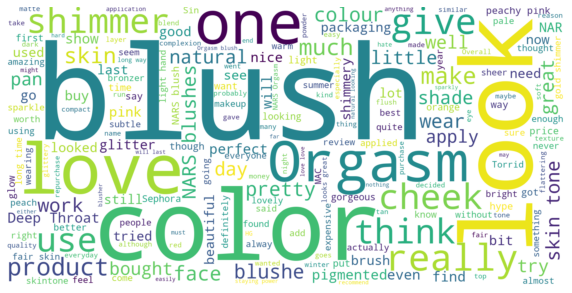

In [34]:
# Wordcloud
all_reviews = " ".join(r for r in products['review'])

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
# Top 20 Words
tokens = products['review'].apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(20)

#Most common words are stop-words and a domain specific word (blush)

,word,occurences
1754,I,22396.0
3347,a,14059.0
3588,and,13421.0
10052,the,12466.0
6893,it,10855.0
6883,is,7768.0
10153,to,7718.0
10087,this,7283.0
4252,but,7013.0
7664,my,6571.0


# Non-Text Data Pre-processing

In [36]:
# Drop not useful columns
products.drop(columns=['price','user_id'], inplace=True)

In [37]:
# Drop data from more than 13 years ago and regroup 'months ago' rows to 'a year ago'
# Drop older years and group months to first year
products['date'] = products['date'].apply(lambda x: x.split(" ")[0] if 'year' in x else 1)
products['date'] = products['date'].apply(lambda x: 1 if x=='a' else int(x))
products['date'] = products['date'].apply(lambda x: -int(x))
products = products[products['date'] >= -13]

# Convert date column to year for better readability
products['date'] = products['date'].apply(lambda x: 2021 + x)

In [38]:
# Check if the dates are formatted correctly
products['date'].value_counts()

2010    1337
2009    1233
2011    1117
2008     880
2012     699
2013     541
2014     333
2015     228
2016     141
2017      81
2018      48
2020      34
2019      34
Name: date, dtype: int64

In [39]:
# Convert repurchase column to numerical
products['repurchase'] = products['repurchase'].apply(lambda x : float(x.strip('%'))/100)

In [40]:
# Relabel 'ratings' column to repurchase again (1) if ratings 4/5 else won't repurchase again (0)
products['repurchase_again'] = products['ratings'].apply(lambda x: 0 if x < 4 else 1 )
products.drop(['ratings'], axis=1, inplace=True)
products.head()

,product,age,date,review,repurchase,packaging,review_length,repurchase_again
0,Blush - Orgasm,36-43,2020,"This blush is suppose to be a universally flattering color. I'm not sure if that is actually possible, but I do think it would flatter a lot of different skin tones. I'm fair with cool undertones,...",0.65,4.1,565,1
1,Blush - Orgasm,44-55,2020,"This blush is a beautiful color. It isn't terribly pigmented imho, but it gives a lovely glow on my fair, cool skin, and it is luminescent.\n\nThe problem I have with this product is the packagin...",0.65,4.1,574,0
2,Blush - Orgasm,30-35,2020,"After purchasing this I didn't want to touch it coz it was soo pretty! I love the colour, pigment and texture, and the packaging is also awesome. Not much into makeup but blush is always in my bea...",0.65,4.1,331,1
3,Blush - Orgasm,44-55,2020,"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush. I love the shimmer on my cheek bones and temples and use Clin...",0.65,4.1,893,1
4,Blush - Orgasm,30-35,2020,I have to mention that the case is fabulous. All my other blushes are great but the case breaks towards the end of its use. This one is strong. Still together. Why can't other brands make their ca...,0.65,4.1,331,1


In [41]:
products['repurchase_again'].value_counts()
# No need to account for class imbalance

1    5075
0    1631
Name: repurchase_again, dtype: int64

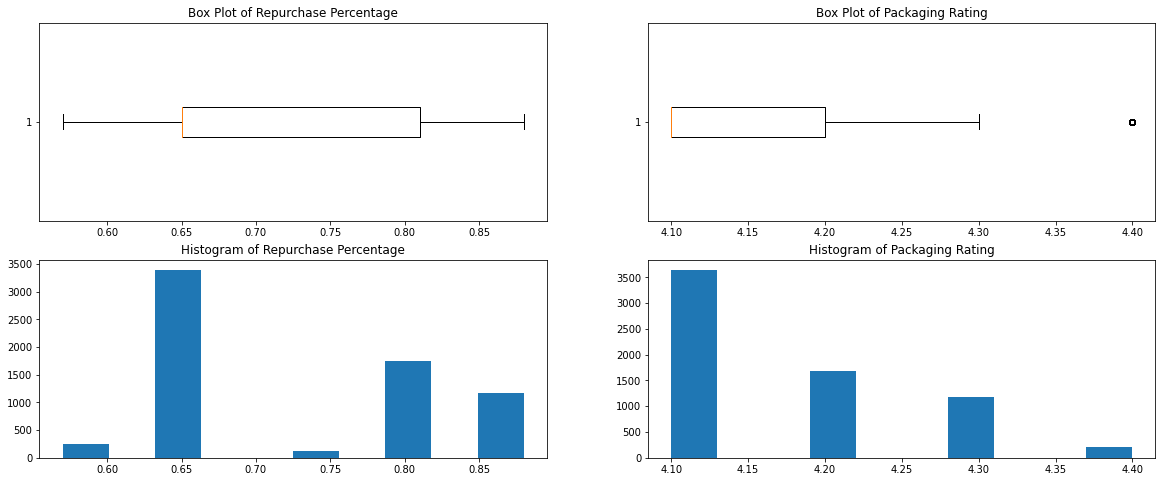

In [42]:
# Boxplot and histogram of Repurchase and Packaging columns
fig, ax = plt.subplots(2,2,figsize=(20,8))
ax[0,0].boxplot(products['repurchase'],vert=False)
ax[0,0].title.set_text('Box Plot of Repurchase Percentage')
ax[1,0].hist(products['repurchase'])
ax[1,0].title.set_text('Histogram of Repurchase Percentage')
ax[0,1].boxplot(products['packaging'],vert=False)
ax[0,1].title.set_text('Box Plot of Packaging Rating')
ax[1,1].hist(products['packaging'])
ax[1,1].title.set_text('Histogram of Packaging Rating')

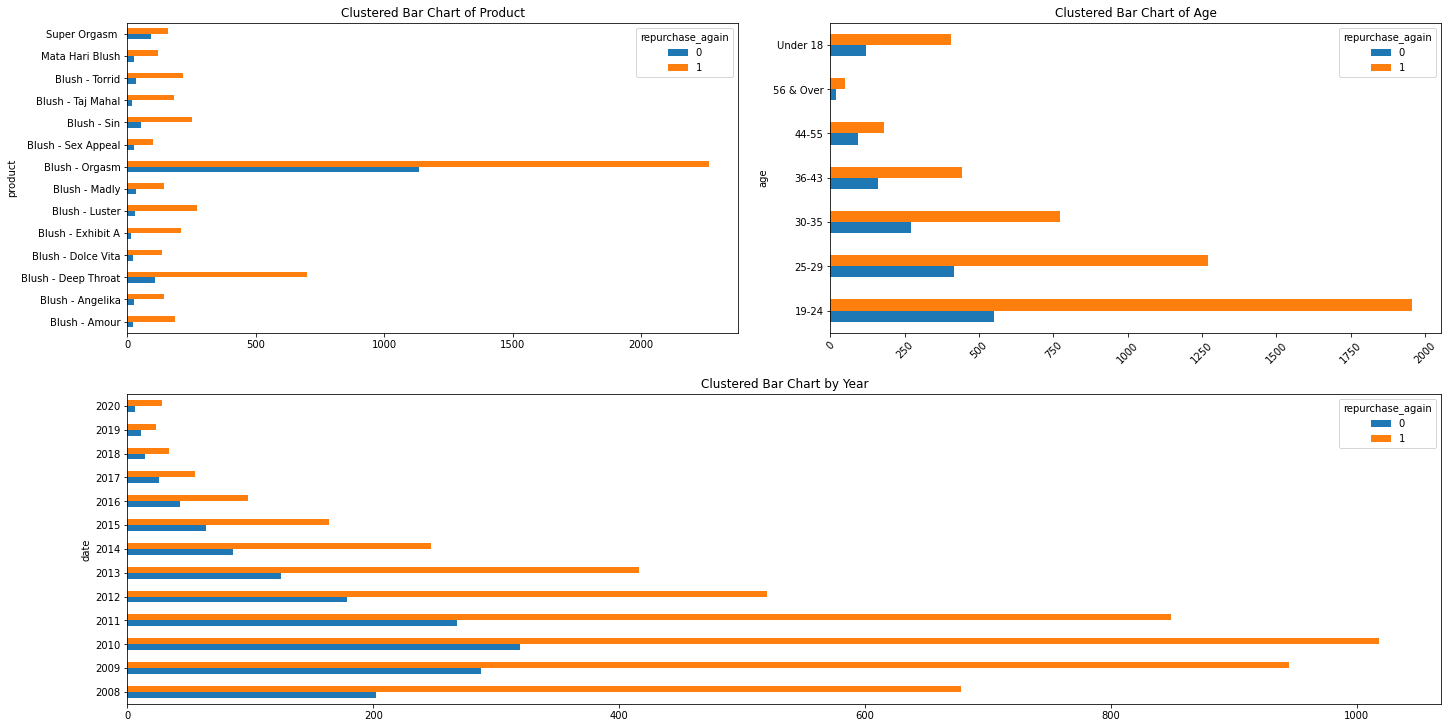

In [43]:
# Plot distribution for Product, Age, Date, Repurchase and Packaging
fig = plt.figure(figsize=(20,10),constrained_layout=True)
gs = gridspec.GridSpec(2,2,figure=fig)
ax1 = fig.add_subplot(gs[0,0])
products.groupby(['product','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax1)
ax1.title.set_text('Clustered Bar Chart of Product')
ax1.tick_params(axis='x', labelrotation=0)

ax2 = fig.add_subplot(gs[0,1])
products.groupby(['age','repurchase_again'])['repurchase_again'].count().unstack().plot(kind='barh',ax=ax2)
ax2.title.set_text('Clustered Bar Chart of Age')
ax2.tick_params(axis='x', labelrotation=45)

ax3 = fig.add_subplot(gs[1,:])
products.groupby(['date','repurchase_again'])['repurchase_again'].count().sort_index().unstack().plot(kind='barh',ax=ax3)
ax3.title.set_text('Clustered Bar Chart by Year')
ax3.tick_params(axis='x', labelrotation=0)

# Generally, most people are willing to repurchase in every category

<AxesSubplot:title={'center':'packaging'}, xlabel='repurchase_again'>

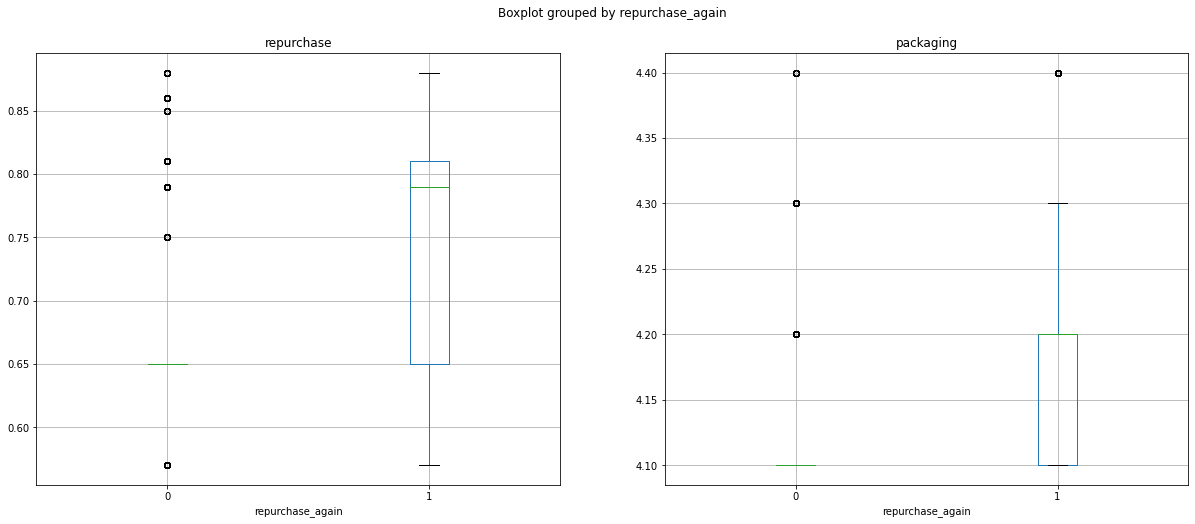

In [44]:
# Boxplot of repurchase and packaging attributes by repurchase_again
fig, ax = plt.subplots(1,2,figsize=(20,8))
products.boxplot('repurchase', by='repurchase_again', ax=ax[0])
products.boxplot('packaging', by='repurchase_again', ax=ax[1])
# Those likely to repurchase again have give higher repurchase ratings and packaging ratings

In [45]:
products.corr()

,date,repurchase,packaging,review_length,repurchase_again
date,1.000000,-0.035592,-0.028083,0.042245,-0.030943
repurchase,-0.035592,1.000000,0.826750,0.079045,0.239467
packaging,-0.028083,0.826750,1.000000,0.081031,0.203778
review_length,0.042245,0.079045,0.081031,1.000000,0.011251
repurchase_again,-0.030943,0.239467,0.203778,0.011251,1.000000


# Text Data Preprocessing

In [46]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import TextBlob, Word

[nltk_data] Downloading package stopwords to /Users/min/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/min/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
# Remove line breaks
def remove_breaks(text):
  text = re.sub(r'\r', '', text)
  return re.sub(r'\n', '', text)

products['review_processed'] = products['review'].apply(lambda x: remove_breaks(x))

In [48]:
# Remove links
def remove_urls(text):
  text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
  text = re.sub(r'[^\s]+.com', '', text)
  return re.sub(r'www.[^\s]+', '', text)

products['review_processed'] = products['review_processed'].apply(lambda x: remove_urls(x))

In [49]:
# Covert to lowercase
products['review_processed'] = products['review_processed'].apply(lambda x: x.lower())

In [50]:
# Expand Contractions
contractions_dict = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

# Function to perform expansion of contractions
def expand_contractions(text, contraction_mapping=contractions_dict):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

products['review_processed'] = products['review_processed'].apply(lambda x : expand_contractions(x,contractions_dict))

In [51]:
# Remove punctuations
products['review_processed'] = products['review_processed'].str.replace('[^\w\s]',' ')

# Remove digits (including words that contain digits because makeup products)
products['review_processed'] = products['review_processed'].apply(lambda x: re.sub('\w*\d\w*',' ', x))

# Lemmatization
products['review_processed'] = products['review_processed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split(" ")]))

# Remove extra whitespaces
products['review_processed'] = products['review_processed'].apply(lambda x: " ".join(x.split()))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [52]:
# Check sample of preprocessed reviews
products[['review', 'review_processed']].sample(n=5)

,review,review_processed
1204,"Despite what many claim, this blush isn't ideal for ALL skin tones. This blush compliments my complexion throughout the majority of the year, however, when I'm my tannest during the summer months,...",despite what many claim this blush is not ideal for all skin tone this pliments plexion throughout the majority of the year however when i am my tannest during the summer month this blush sometime...
9463,"This is just one of those products which is absolutely not made for everyone ... and that's what makes it fantastic.\r\n<br><br>\r\nIf you aren't paler than MAC NC/W 15 or so, this probably won't ...",this is just one of those product which is absolutely not made for everyone and that is what make it fantastic br br if you are not paler than mac nc w or so this probably will not do anything for...
7415,I bought this when I was looking for a nude-beige-pink blush for my NC20 (light with warm undertones) skin. It looked just right when I swatched the color on my hand - a lovely tan pink with just...,i bought this when i wa looking for a nude beige pink blush for my light with warm undertone skin it looked just right when i swatched the color on my hand a lovely tan pink with just enough brown...
1961,"If you want to look like a cheap barbie with sparkley, glittery cheeks i would reccomend this product to you. Don't get me wrong, its BEAUTIFUL in the pan with all that gold..but on your cheeks? n...",if you want to look like a cheap barbie with sparkley glittery cheek i would end this product to you do not get me wrong it beautiful in the pan with all that gold but on your cheek not so much is...
5778,Very light peach with shimmers.\r\nNatural and gives a slight flush.\r\nStays on all-day.\r\nDoes not make cheeks look oily.,very light peach with shimmer natural and give a slight flush stay on all day doe not make cheek look oily


# Feature Engineering

In [53]:
from sklearn import preprocessing
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from nltk.corpus import stopwords

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/min/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [54]:
# Conduct One-hot Encoding for Product and Age because they are nominal data (have to remove 1 dummy variable column to remove multi-collinearity problem)
products = pd.concat([products, pd.get_dummies(products['product'], prefix='product', drop_first=True)], axis=1)
products = pd.concat([products, pd.get_dummies(products['age'], prefix='age', drop_first=True)], axis=1)
products.drop(columns=['product','age'], inplace=True)

In [55]:
# Normalize the numerical columns so that the data remains in its proportional distribution (data distribution is not gaussian so cannot use standardization)
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Normalize the numeric columns
products[['repurchase','packaging']] = scaler.fit_transform(products[['repurchase','packaging']])

In [56]:
products.describe()

,date,repurchase,packaging,review_length,repurchase_again,product_Blush - Angelika,product_Blush - Deep Throat,product_Blush - Dolce Vita,product_Blush - Exhibit A,product_Blush - Luster,...,product_Blush - Taj Mahal,product_Blush - Torrid,product_Mata Hari Blush,product_Super Orgasm,age_25-29,age_30-35,age_36-43,age_44-55,age_56 & Over,age_Under 18
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,...,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,2010.903668,0.502958,0.230639,486.307188,0.756785,0.024903,0.120191,0.023114,0.033403,0.044736,...,0.029675,0.037131,0.021772,0.037131,0.250969,0.155681,0.089919,0.041008,0.010289,0.078288
std,2.360430,0.300575,0.288007,365.659387,0.429056,0.155841,0.325209,0.150276,0.179700,0.206739,...,0.169702,0.189097,0.145948,0.189097,0.433603,0.362580,0.286088,0.198324,0.100920,0.268644
min,2008.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,0.258065,0.000000,250.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,0.258065,0.000000,401.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2012.000000,0.774194,0.333333,614.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,1.000000,1.000000,5519.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Initialise VADER Sentiment Analyser
analyzer = SentimentIntensityAnalyzer()

In [58]:
# Create new features
products['polarity'] = products['review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
products['subjectivity'] = products['review'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
products['word_count'] = products['review_processed'].apply(lambda x: len(str(x).split(" ")))
products['char_count'] = products['review_processed'].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
products['avg_word_length'] = products['char_count'] / products['word_count']

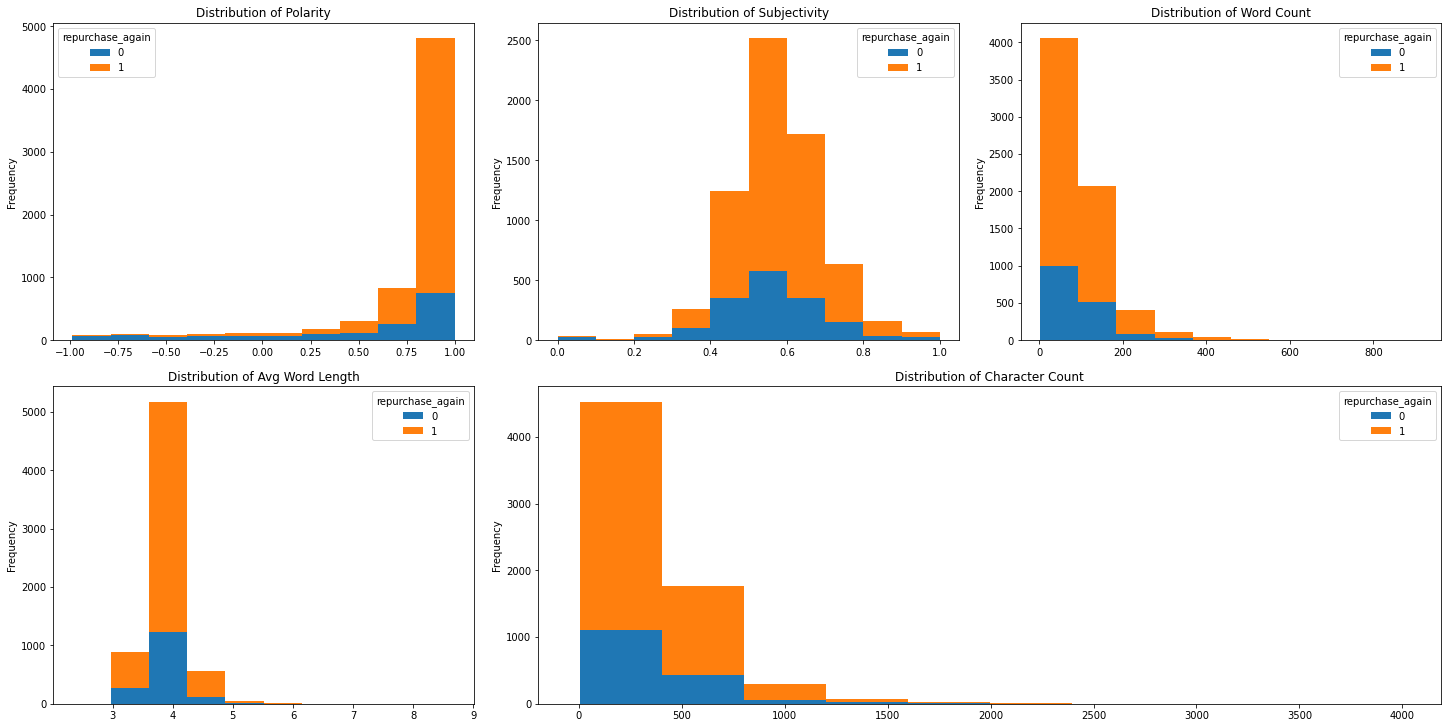

In [59]:
# Histogram of new features
fig = plt.figure(figsize=(20,10),constrained_layout=True)
gs = gridspec.GridSpec(2,3,figure=fig)
ax1 = fig.add_subplot(gs[0,0])
products.pivot(columns='repurchase_again').polarity.plot(kind = 'hist',stacked=True,ax=ax1)
ax1.title.set_text('Distribution of Polarity')

ax2 = fig.add_subplot(gs[0,1])
products.pivot(columns='repurchase_again').subjectivity.plot(kind = 'hist',stacked=True, ax=ax2)
ax2.title.set_text('Distribution of Subjectivity')

ax3 = fig.add_subplot(gs[0,2])
products.pivot(columns='repurchase_again').word_count.plot(kind = 'hist',stacked=True,ax=ax3)
ax3.title.set_text('Distribution of Word Count')

ax4 = fig.add_subplot(gs[1,0])
products.pivot(columns='repurchase_again').avg_word_length.plot(kind = 'hist',stacked=True,ax= ax4)
ax4.title.set_text('Distribution of Avg Word Length')

ax5 = fig.add_subplot(gs[1,1:])
products.pivot(columns='repurchase_again').char_count.plot(kind = 'hist',stacked=True,ax=ax5)
ax5.title.set_text('Distribution of Character Count')

# Similar distributions across the different target value

<AxesSubplot:title={'center':'char_count'}, xlabel='repurchase_again'>

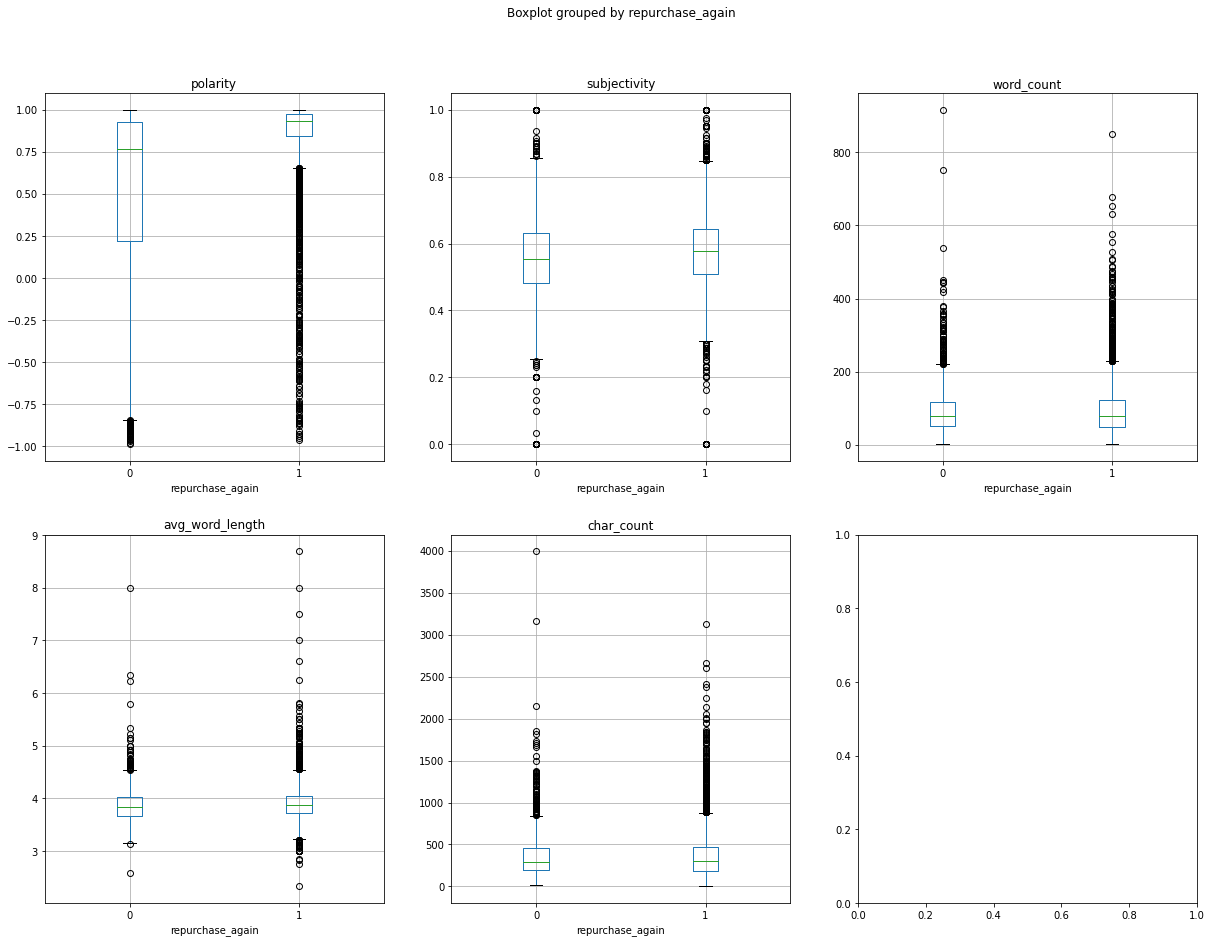

In [60]:
# Boxplot of new features
fig, ax = plt.subplots(2,3,figsize=(20,15))
products.boxplot('polarity',by='repurchase_again',ax=ax[0,0])
products.boxplot('subjectivity',by='repurchase_again',ax=ax[0,1])
products.boxplot('word_count',by='repurchase_again',ax=ax[0,2])
products.boxplot('avg_word_length',by='repurchase_again',ax=ax[1,0])
products.boxplot('char_count',by='repurchase_again',ax=ax[1,1])
# Those who repurchase again have higher polarity, higher subjectivity, similar word count, similar character count, higher average word length compared to those who don't repurchase again

In [61]:
# Normalize word_count, avg_word_length and char_count columns
products[['word_count','avg_word_length','char_count']] = scaler.fit_transform(products[['word_count','avg_word_length','char_count']])

In [62]:
products.describe()

,date,repurchase,packaging,review_length,repurchase_again,product_Blush - Angelika,product_Blush - Deep Throat,product_Blush - Dolce Vita,product_Blush - Exhibit A,product_Blush - Luster,...,age_30-35,age_36-43,age_44-55,age_56 & Over,age_Under 18,polarity,subjectivity,word_count,char_count,avg_word_length
count,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,...,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000,6706.000000
mean,2010.903668,0.502958,0.230639,486.307188,0.756785,0.024903,0.120191,0.023114,0.033403,0.044736,...,0.155681,0.089919,0.041008,0.010289,0.078288,0.761122,0.573948,0.102045,0.091015,0.245290
std,2.360430,0.300575,0.288007,365.659387,0.429056,0.155841,0.325209,0.150276,0.179700,0.206739,...,0.362580,0.286088,0.198324,0.100920,0.268644,0.387939,0.122565,0.075997,0.068846,0.049572
min,2008.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.988100,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,0.258065,0.000000,250.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.770250,0.501262,0.052402,0.046173,0.216103
50%,2010.000000,0.258065,0.000000,401.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.916800,0.572038,0.085153,0.075031,0.241311
75%,2012.000000,0.774194,0.333333,614.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.966475,0.641573,0.129913,0.114931,0.268959
max,2020.000000,1.000000,1.000000,5519.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.999500,1.000000,1.000000,1.000000,1.000000


## Feature Engineering with Twitter Data

In [63]:
twitter_scores = pd.read_csv('data/alltweets_score.csv')
twitter_scores

,year_new,vader,subjectivity
0,2008,0.371095,0.459237
1,2009,0.372626,0.475603
2,2010,0.363930,0.490337
3,2011,0.314978,0.483623
4,2012,0.314342,0.471159
5,2013,0.265203,0.455515
6,2014,0.274153,0.439074
7,2015,0.253708,0.426396
8,2016,0.253013,0.419337
9,2017,0.231176,0.413557


In [64]:
# Create empty columns for Twitter sentiment and subjectivity
products['twitter_sentiment'] = 0
products['twitter_subjectivity'] = 0

In [65]:
# Add scores to each year
products_groups = products.groupby(['date'])
products_groups = [products_groups.get_group(x) for x in products_groups.groups]

for group in products_groups:
    year = group.iloc[0]['date']
    products.loc[products['date'] == year,'twitter_sentiment'] = twitter_scores.loc[twitter_scores['year_new'] == year, 'vader'].values[0]
    products.loc[products['date'] == year,'twitter_subjectivity'] = twitter_scores.loc[twitter_scores['year_new'] == year, 'subjectivity'].values[0]

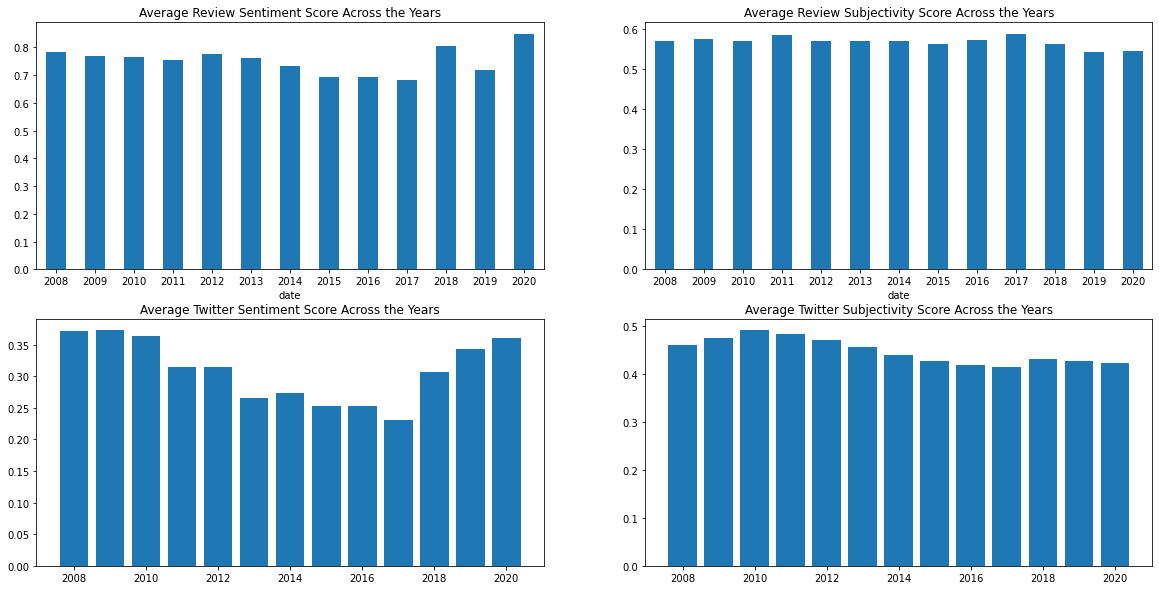

In [66]:
fig, ax = plt.subplots(2,2,figsize=(20,10))
products.groupby(['date'])['polarity'].mean().plot(kind='bar',ax=ax[0,0])
ax[0,0].title.set_text('Average Review Sentiment Score Across the Years')
ax[0,0].tick_params(axis='x', labelrotation=0)
products.groupby(['date'])['subjectivity'].mean().plot(kind='bar',ax=ax[0,1])
ax[0,1].title.set_text('Average Review Subjectivity Score Across the Years')
ax[0,1].tick_params(axis='x', labelrotation=0)
ax[1,0].bar(products['date'],products['twitter_sentiment'])
ax[1,0].title.set_text('Average Twitter Sentiment Score Across the Years')
ax[1,1].bar(products['date'],products['twitter_subjectivity'])
ax[1,1].title.set_text('Average Twitter Subjectivity Score Across the Years')

In [67]:
products.shape

(6706, 33)

## Model Building

In [ ]:
# Export data
products.to_csv('data/preprocessed_data.csv', index = False)